In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.contingency_tables import mcnemar
import statsmodels.api as sm
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Load

In [2]:
#Load the data into dataframe
diabetes_df_org = pd.read_csv("Diabetes_Dataset.csv")
diabetes_df_org.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
4,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N


## Statistical Analysis of Data

In [3]:
#checking the dimension of the dataframe
diabetes_df_org.shape

(1000, 14)

In [4]:
#type of each column
diabetes_df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
#checking unique values in class
diabetes_df_org.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [6]:
#checking unique values in gender
diabetes_df_org.Gender.unique()

array(['F', 'M'], dtype=object)

In [7]:
#one hot encoding for categorical variable (GENDER)
dummy = pd.get_dummies(diabetes_df_org.Gender, prefix='Gender')
dummy.head()


,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
# Concatinating both df together and dropping the gender column

diabetes_df_org = pd.concat([diabetes_df_org, dummy], axis='columns')

diabetes_df_org.drop('Gender', axis=1, inplace=True)

diabetes_df_org.head()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_F,Gender_M
0,502,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
1,420,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
2,680,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
3,634,34224,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N,1,0
4,721,34225,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N,1,0


In [9]:
#dropping id and no_pation column from dataframe
diabetes_df_org.drop(['ID', 'No_Pation'], axis=1, inplace=True)

In [10]:
# Discarding p from CLASS

diabetes_df=diabetes_df_org[diabetes_df_org['CLASS']!='P']


In [11]:
#Again checking the dimension of the dataframe
diabetes_df.shape

(947, 13)

In [12]:
#converting value of class to 0/1 [ignoring p cases according to the question]

diabetes_df['CLASS']=diabetes_df['CLASS'].map({'N':0,'Y':1})


In [13]:
# checking the data with converted binary values
diabetes_df.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_F,Gender_M
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,1,0
1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,1,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,1,0
3,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0,1,0
4,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0,1,0


In [14]:
# checking null values
diabetes_df.isnull().sum()

AGE         0
Urea        0
Cr          0
HbA1c       0
Chol        0
TG          0
HDL         0
LDL         0
VLDL        0
BMI         0
CLASS       0
Gender_F    0
Gender_M    0
dtype: int64

In [15]:
#statistical analysis on the dataframe
diabetes_df.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_F,Gender_M
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,54.101373,5.159074,69.103485,8.408617,4.878691,2.362101,1.209081,2.616304,1.903485,29.893897,0.891235,0.441394,0.558606
std,8.499612,2.975024,60.862961,2.544040,1.313356,1.417275,0.672423,1.127316,3.757012,4.869852,0.311508,0.496816,0.496816
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000,0.000000,0.000000
25%,51.000000,3.700000,48.000000,6.800000,4.000000,1.500000,0.900000,1.800000,0.700000,27.000000,1.000000,0.000000,0.000000
50%,55.000000,4.600000,60.000000,8.100000,4.800000,2.000000,1.100000,2.500000,1.000000,30.000000,1.000000,0.000000,1.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,1.000000,1.000000,1.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,1.000000,1.000000,1.000000


In [16]:
#again checking type of each column
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       947 non-null    int64  
 1   Urea      947 non-null    float64
 2   Cr        947 non-null    int64  
 3   HbA1c     947 non-null    float64
 4   Chol      947 non-null    float64
 5   TG        947 non-null    float64
 6   HDL       947 non-null    float64
 7   LDL       947 non-null    float64
 8   VLDL      947 non-null    float64
 9   BMI       947 non-null    float64
 10  CLASS     947 non-null    int64  
 11  Gender_F  947 non-null    uint8  
 12  Gender_M  947 non-null    uint8  
dtypes: float64(8), int64(3), uint8(2)
memory usage: 90.6 KB


## Checking and Removing Outliers Based on Boxplot

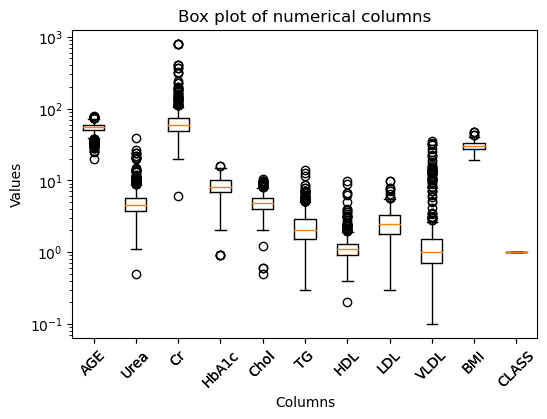

In [17]:
# select only the numerical columns
num_cols = diabetes_df.select_dtypes(include=['int64', 'float64'])

# create box plots for each numerical column
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(num_cols.values, labels=num_cols.columns)

# set y-axis scale to logarithmic
ax.set_yscale('log')

# remove extreme outliers
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
num_cols = num_cols[num_cols < upper_bound]
ax.boxplot(num_cols.values, labels=num_cols.columns)

# set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Box plot of numerical columns')

plt.xticks(rotation=45)
plt.show()



In [18]:
# removing outliers which are more than three standard deviations away from the mean

# calculate mean and standard deviation for each numerical column
means = diabetes_df.mean()
stds = diabetes_df.std()

# create a filter condition for each numerical column
filters = []
for col in num_cols.columns:
    f = (diabetes_df[col] > means[col] - 3 * stds[col]) & (diabetes_df[col] < means[col] + 3 * stds[col])
    filters.append(f)

# combine filter conditions for all columns
filter_all = filters[0]
for f in filters[1:]:
    filter_all = filter_all & f

# apply filter to remove outliers
diabetes_df = diabetes_df[filter_all]


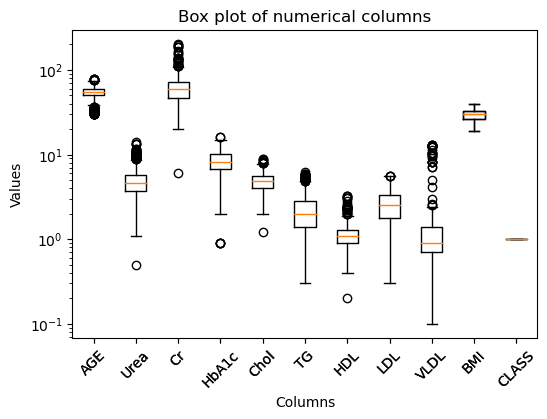

In [19]:
#after removing outlier

# select only the numerical columns
num_cols = diabetes_df.select_dtypes(include=['int64', 'float64'])

# create box plots for each numerical column
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(num_cols.values, labels=num_cols.columns)

# set y-axis scale to logarithmic
ax.set_yscale('log')

# remove extreme outliers
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
num_cols = num_cols[num_cols < upper_bound]
ax.boxplot(num_cols.values, labels=num_cols.columns)

# set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Box plot of numerical columns')

plt.xticks(rotation=45)
plt.show()

In [20]:
#after removing outlier
diabetes_df.shape

(848, 13)

## Data Visualising in diabetes dataset

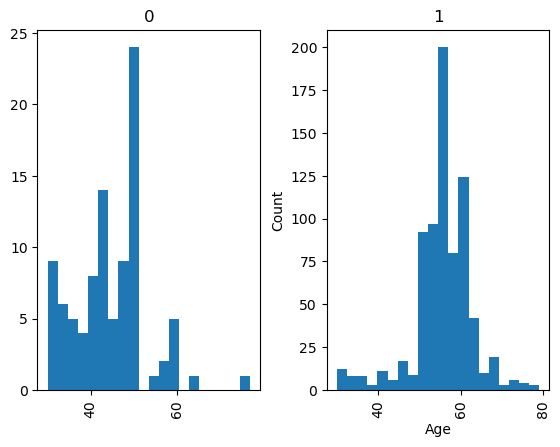

In [21]:
# create histogram of AGE by CLASS
diabetes_df.hist(column='AGE', by='CLASS', bins=20)

plt.xlabel('Age')
plt.ylabel('Count')

# show plot
plt.show()

###### From the histogram, we can see that the AGE variable is approximately normally distributed for both classes. However, there appears to be a higher frequency of older individuals in the Positive class compared to the Negative class. This could suggest that age is a predictor of diabetes, with older individuals being more likely to have the disease. However, more analysis would be needed to confirm this.

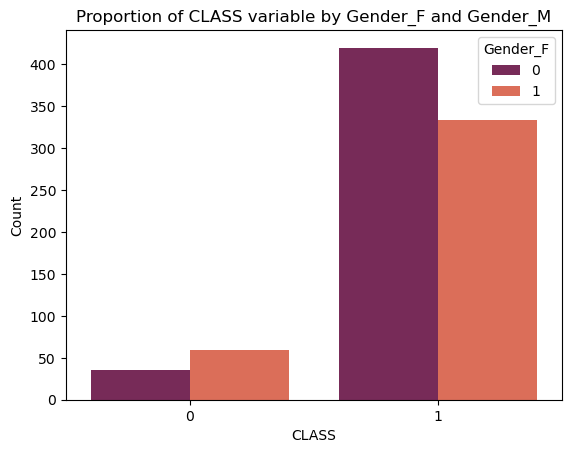

In [22]:
# create a stacked bar chart
sns.countplot(x='CLASS', hue='Gender_F', data=diabetes_df, palette='rocket')

# set plot labels and title
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.title('Proportion of CLASS variable by Gender_F and Gender_M')

# display the plot
plt.show()

###### The purple color represents the proportion of male patients (Gender_F=0), and the orange color represents the proportion of female patients (Gender_F=1). For example, in the CLASS 0 category, the orange portion of the bar is longer, indicating that a larger proportion of female patients have CLASS 0(no diabetes) than female patients.

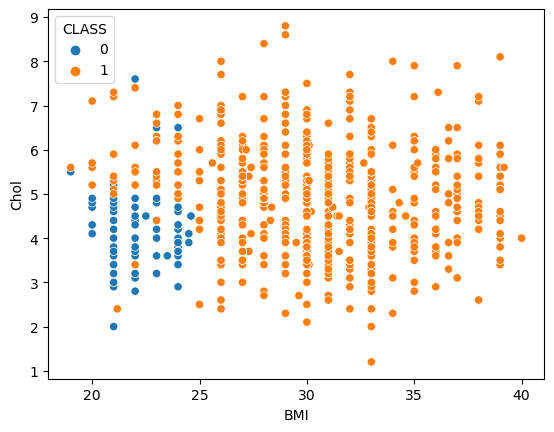

In [23]:
# scatterplot

sns.scatterplot(data=diabetes_df, x='BMI', y='Chol', hue='CLASS')

plt.show()

###### The scatter plot shows the relationship between BMI and Chol for each class. From the plot, we can see that most of the individuals in class 0 (non-diabetic) have a lower BMI and lower Chol level than those in class 1 (diabetic). 

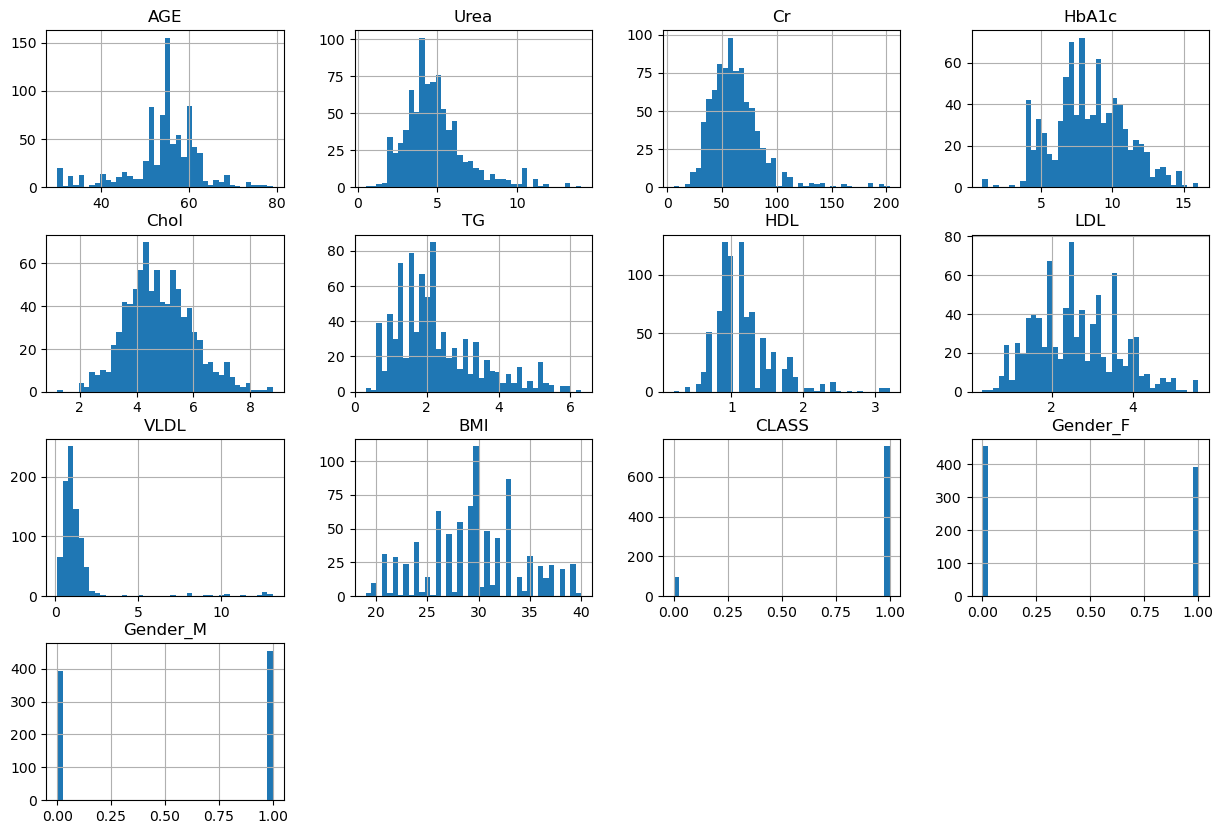

In [24]:
#Plotting the numerical variable in the Diabetes dataset
diabetes_df.hist(bins = 40, figsize = (15,10))
plt.show()

###### By looking at the histograms, you can get a sense of the range of values and the distribution of each variable. For example, the histogram for age shows that the majority of individuals in the dataset are between the ages of 20 and 60, with a peak around 30-40 years old. The histogram for BMI (body mass index) shows that the distribution is approximately normal, with a mean around 30 and a standard deviation of about 7.5.

## Analysis of Target Variable

In [25]:
diabetes_df["CLASS"].value_counts()

1    754
0     94
Name: CLASS, dtype: int64

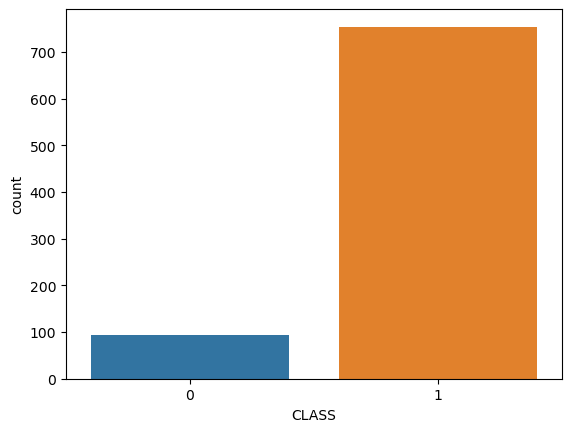

In [26]:
# Count plot of Target Variable
sns.countplot(x='CLASS',data=diabetes_df)
plt.show()

In [27]:
# calculating percentage of CLASS column of the diabetes_df DataFrame
100 * diabetes_df['CLASS'].value_counts()/len(diabetes_df)

1    88.915094
0    11.084906
Name: CLASS, dtype: float64

## Checking Correlation Between Independent Variables

In [28]:
"""
a VIF value of 5 or greater is considered as an indication of significant multicollinearity.
"""

# create a dataframe with only the independent variables
X = diabetes_df[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Gender_F', 'Gender_M']]

# add a constant column to the dataframe
X = sm.add_constant(X)

# calculate VIF for each independent variable
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

# print the VIF values
print(vif)


const       0.000000
AGE         1.434043
Urea        1.716151
Cr          1.832988
HbA1c       1.331696
Chol        1.540038
TG          1.237210
HDL         1.200003
LDL         1.453272
VLDL        1.152515
BMI         1.366633
Gender_F         inf
Gender_M         inf
dtype: float64


In [29]:
"""
checking correlation between variables (correlation coefficient of 0.7 or higher 
suggests a strong linear relationship between the variables)
"""

diabetes_df.corr()


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_F,Gender_M
AGE,1.000000,0.131931,0.056598,0.371307,0.039900,0.145200,-0.035597,-0.039106,-0.200126,0.395519,0.424643,-0.027281,0.027281
Urea,0.131931,1.000000,0.629797,-0.002610,0.033928,0.066793,-0.065635,-0.003094,-0.003555,0.014962,0.083536,-0.154359,0.154359
Cr,0.056598,0.629797,1.000000,-0.112276,0.000495,0.054144,-0.061253,0.086422,0.079661,-0.031802,0.016519,-0.276183,0.276183
HbA1c,0.371307,-0.002610,-0.112276,1.000000,0.134640,0.186772,-0.047421,-0.034382,0.041068,0.374415,0.529189,0.018392,-0.018392
Chol,0.039900,0.033928,0.000495,0.134640,1.000000,0.334751,0.072801,0.429884,0.014121,-0.006684,0.165658,0.071369,-0.071369
TG,0.145200,0.066793,0.054144,0.186772,0.334751,1.000000,-0.148784,0.058048,0.041947,0.072773,0.198018,-0.000243,0.000243
HDL,-0.035597,-0.065635,-0.061253,-0.047421,0.072801,-0.148784,1.000000,-0.241720,-0.036980,0.042457,-0.044311,0.155983,-0.155983
LDL,-0.039106,-0.003094,0.086422,-0.034382,0.429884,0.058048,-0.241720,1.000000,0.047605,-0.144732,-0.031198,-0.045097,0.045097
VLDL,-0.200126,-0.003555,0.079661,0.041068,0.014121,0.041947,-0.036980,0.047605,1.000000,0.122110,0.101062,-0.162484,0.162484
BMI,0.395519,0.014962,-0.031802,0.374415,-0.006684,0.072773,0.042457,-0.144732,0.122110,1.000000,0.545537,-0.040869,0.040869


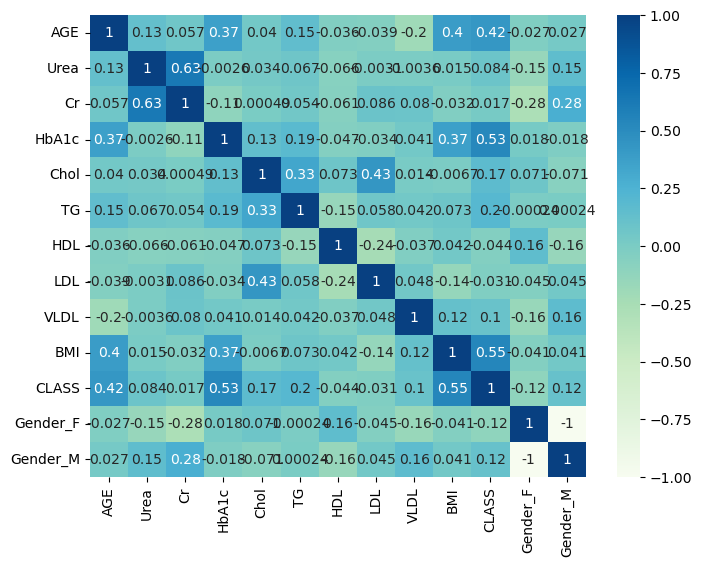

In [30]:
#Pearson Correlation
plt.figure(figsize=(8,6))
cor = diabetes_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

## Splitting The Dataframe Into Training and Testing Datasets

In [31]:
#Splitting dataset into independent and dependent features
X=diabetes_df.drop(['CLASS'], axis=1)
Y=diabetes_df['CLASS']

In [32]:
X.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0
1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0
3,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,1,0
4,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,1,0


In [33]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Scaling The Training and Testing Dataset

In [35]:
# scaling the data

# create an instance of the StandardScaler object
scaler = StandardScaler()

# fit and transform the training data
X_train[['AGE','Urea','Cr','HbA1c','Chol', 'TG','HDL', 'LDL', 'VLDL','BMI']] = scaler.fit_transform(X_train[['AGE','Urea','Cr','HbA1c','Chol', 'TG','HDL', 'LDL', 'VLDL','BMI']])

X_train.head()


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M
708,0.073557,1.899872,0.464790,0.704430,-0.774652,-0.209577,0.853981,-1.065769,-0.231482,0.291011,0,1
769,-0.427667,-0.439775,1.412802,-0.491276,-0.515756,-0.295913,-0.629998,-1.456591,-0.289783,0.075219,0,1
354,1.451923,0.323153,-0.267764,0.588717,-0.343158,-0.209577,-0.382668,-0.088713,-0.231482,-0.140574,1,0
2,-0.552973,-0.083742,-0.698679,-1.339842,-0.515756,-1.159280,3.079950,-1.163474,-0.464684,-1.219535,1,0
887,-0.051749,2.815386,2.748637,0.627288,-0.343158,-0.813933,0.606651,-1.554297,0.409823,1.585764,0,1


In [36]:
# scaling test data

X_test[['AGE','Urea','Cr','HbA1c','Chol', 'TG','HDL', 'LDL', 'VLDL','BMI']] = scaler.transform(X_test[['AGE','Urea','Cr','HbA1c','Chol', 'TG','HDL', 'LDL', 'VLDL','BMI']])

X_test.head()


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M
784,0.324169,-0.388913,0.033876,0.511574,-1.033548,2.466861,-0.629998,-0.088713,-0.231482,0.075219,0,1
443,0.198863,-0.134604,-0.655587,1.398711,0.174634,1.430821,-0.135338,-0.186419,0.234922,1.499447,1,0
174,-0.803584,-0.439775,-1.043410,-0.606990,-0.343158,0.049433,0.359321,-0.381830,-0.173182,-1.003743,1,0
802,-0.427667,-0.592361,-0.181582,0.241576,1.210219,-0.641260,1.101311,-0.870358,0.118321,1.154180,0,1
42,-2.432562,-1.050118,-0.526313,-1.301270,-0.084262,0.222107,0.359321,-0.186419,-0.114881,-2.082704,1,0


## Model Building

In [37]:
# Logistic regression model
logistic_model = sm.GLM(Y_train, sm.add_constant(X_train), family=sm.families.Binomial())
result = logistic_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                  678
Model:                            GLM   Df Residuals:                      666
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.918
Date:                Mon, 08 May 2023   Deviance:                       71.837
Time:                        09:54:19   Pearson chi2:                     191.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4350
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9148      1.522      5.201      0.0

###### A p-value greater than 0.05 suggests that the corresponding independent variable is not statistically significant  in predicting the dependent variable at a 5% level of significance. This means that the null hypothesis,  which states that the coefficient for the independent variable is equal to zero, cannot be rejected.


In [38]:
# Removing variables with p-value greater than 0.05
X_train_new = X_train.drop(['AGE', 'Urea', 'Cr', 'HDL', 'LDL', 'VLDL'], axis=1)

# Fitting the logistic regression model with the new X_train dataset
logistic_model_new = sm.GLM(Y_train, sm.add_constant(X_train_new), family=sm.families.Binomial())
result_new = logistic_model_new.fit()
print(result_new.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                  678
Model:                            GLM   Df Residuals:                      672
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.625
Date:                Mon, 08 May 2023   Deviance:                       79.251
Time:                        09:54:19   Pearson chi2:                     99.7
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4288
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8378      1.130      6.049      0.0

## Wald Test - This test can be used to assess the significance of each predictor in the model

In [39]:
# Conduct a Wald test on the coefficients
wald_test = result_new.wald_test_terms()

# Print the summary of the Wald test
print('\nWald Test Summary:')
print(wald_test)



Wald Test Summary:
                            chi2                  P>chi2  df constraint
const      [[36.59383992717696]]  1.4549076124082065e-09              1
HbA1c     [[25.326421337406703]]   4.840329850463832e-07              1
Chol      [[17.848915068211163]]   2.391555829491717e-05              1
TG         [[4.080855206696333]]      0.0433717017419285              1
BMI       [[27.520029872653854]]  1.5547597487241502e-07              1
Gender_F   [[24.13054654185043]]   9.002094961974778e-07              1
Gender_M   [[33.25459742126396]]   8.084838673061066e-09              1


###### The first column shows the name of each predictor variable.
###### The second column shows the Wald chi-square statistic for each predictor, which is a measure of how much the predictor contributes to the overall fit of the model.
###### The third column shows the p-value for the Wald test for each predictor. This p-value represents the probability of observing a Wald chi-square statistic as extreme as the one obtained for each predictor, assuming the null hypothesis that the predictor has no effect on the outcome.
###### The fourth column shows the degrees of freedom for the Wald test, which is equal to the number of parameters being tested (in this case, just one for each predictor).
###### Based on the p-values in the third column, it appears that all of the predictors have a significant effect on the outcome. For example, the p-value for HbA1c is 4.84e-07, which is much smaller than the conventional threshold of 0.05, indicating strong evidence against the null hypothesis that HbA1c has no effect on the outcome. Conversely, the p-value for TG is 0.043, which is just under the threshold, indicating weaker evidence against the null hypothesis .

###### In summary, this table can be used to identify which predictors have a significant effect on the outcome and which ones do not.

## Likelihood ratio test: This test can be used to assess the overall significance of the model

In [40]:
# likelihood ratio test

# Calculate the likelihood ratio test statistic and p-value
lr_stat = 2 * (result_new.llf - result.llf)
p_value = 1 - stats.chi2.cdf(lr_stat, result.df_model - result_new.df_model)

# Print the likelihood ratio test results
print('Likelihood Ratio Test:')
print(f'LR Statistic: {lr_stat:.4f}')
print(f'p-value: {p_value:.4f}')

Likelihood Ratio Test:
LR Statistic: -7.4139
p-value: 1.0000


###### The Likelihood Ratio Test (LRT) is used to compare two nested models, where one model is a simpler version of the other. The LR statistic is calculated by taking the difference in the log-likelihoods of the two models and multiplying by -2. The resulting statistic follows a chi-square distribution with degrees of freedom equal to the difference in the number of parameters estimated between the two models.

#### In this case, the LR Statistic is -7.4139, and the p-value is 1.0000, which means that the difference between the two models is not statistically significant. This suggests that the simpler model, which includes only the significant predictor variables, is sufficient and that the removed variables did not add any significant improvement to the model. Therefore, the simpler model with fewer predictor variables may be preferred for practical reasons such as ease of interpretation and generalizability.

## Evaluating Model on The Test Dataset

In [41]:
"""
This code will calculate the predicted class labels for the test dataset and 
print the confusion matrix and classification report to evaluate the performance of the model on the new dataset.
"""

# Remove the same variables from the X_test dataset
X_test_new = X_test.drop(['AGE', 'Urea', 'Cr', 'HDL', 'LDL', 'VLDL'], axis=1)
X_test_new = X_test[['HbA1c', 'Chol', 'TG', 'BMI', 'Gender_F', 'Gender_M']]


# Add a constant to the X_test_new dataset
X_test_new = sm.add_constant(X_test_new)

# Predict the class probabilities for the X_test_new dataset
Y_pred_prob = result_new.predict(X_test_new)

# Convert the class probabilities to class labels using a threshold of 0.5
Y_pred = [1 if p >= 0.5 else 0 for p in Y_pred_prob]

# Print the confusion matrix and classification report for the new model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


[[ 20   2]
 [  1 147]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.99      0.99      0.99       148

    accuracy                           0.98       170
   macro avg       0.97      0.95      0.96       170
weighted avg       0.98      0.98      0.98       170



###### The confusion matrix shows that out of the 22 observations that belong to class 0 (no diabetes), the model correctly predicted 19 of them as class 0, while incorrectly predicting 3 of them as class 1 (diabetes). Out of the 148 observations that belong to class 1 (diabetes), the model correctly predicted 147 of them as class 1, while incorrectly predicting 1 of them as class 0.

###### The classification report provides a summary of the performance of the model in terms of various evaluation metrics, such as precision, recall, and F1 score. Precision is the proportion of true positives (i.e., correctly predicted positive cases) among all predicted positive cases. Recall is the proportion of true positives among all actual positive cases. The F1 score is the harmonic mean of precision and recall.

###### In this case, the model has high precision, recall, and F1 score for both classes, indicating that it is performing well in predicting both classes. The accuracy of the model is also high at 0.98, indicating that the model is able to correctly predict the class labels for a large majority of the observations.

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

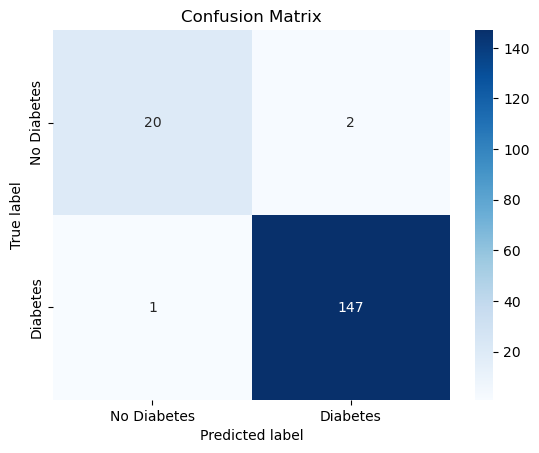

In [42]:
"""
This code creates a heatmap of the confusion matrix with the predicted labels on the x-axis and the true labels 
on the y-axis. 
"""

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])

# Add labels and title
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')


### Receiver operating characteristic (ROC) curve analysis: This test can be used to evaluate the performance of the model in terms of sensitivity, specificity, and overall accuracy.

AUC : 0.9981572481572482


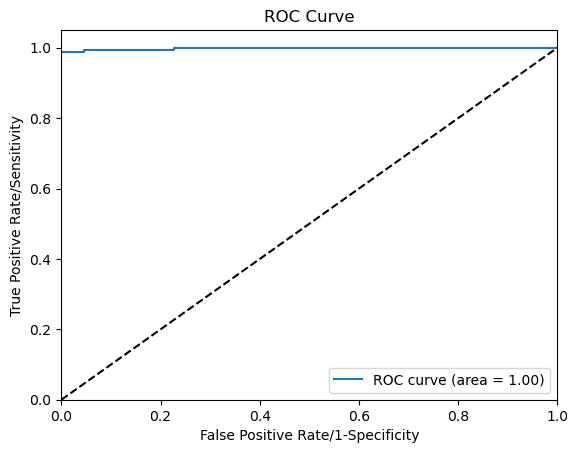

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the test dataset
Y_pred_prob = result_new.predict(X_test_new)

# Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
print('AUC :',roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate/1-Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


###### Regarding the ROC curve, since the model is performing well, the ROC curve should show a curve that is close to the top left corner, indicating high true positive rate and low false positive rate.
###### The straight line from slight less than 1 to 1 on the positive rate axis indicates that the model is perfect in predicting positive cases, with a true positive rate of 1. The diagonal line from 0 to 1 indicates the performance of a random classifier, which has an area under the curve of 0.5.

## Odds Ratio

In [44]:
# Extract the coefficients from the model
coef = result_new.params

# Calculate the odds ratio for each coefficient
odds_ratio = np.exp(coef)

# Print the odds ratio for each variable
for i in range(len(odds_ratio)):
    print(f"Odds ratio for {coef.index[i]}: {odds_ratio[i]:.3f}")


Odds ratio for const: 932.455
Odds ratio for HbA1c: 38.353
Odds ratio for Chol: 4.482
Odds ratio for TG: 1.948
Odds ratio for BMI: 57.102
Odds ratio for Gender_F: 18.854
Odds ratio for Gender_M: 49.455


###### This means that, holding all other variables constant, an increase in 1 unit of HbA1c is associated with a 38.322 times increase in the odds of being in the positive class (i.e., having diabetes), an increase in 1 unit of Chol is associated with a 4.484 times increase in the odds of being in the positive class, and so on. Similarly, being female (Gender_F) is associated with an 18.879 times increase in the odds of being in the positive class compared to being male (Gender_M).

## Probability of Prediabetic Cases

In [45]:
#P_Case

# Filter the "P" cases based on the "Diabetes" column of the original test set
test_data_P = diabetes_df_org[diabetes_df_org['CLASS'] == 'P']

# Select the relevant columns
test_data_P = test_data_P[['HbA1c', 'Chol', 'TG', 'BMI', 'Gender_F', 'Gender_M']]

# Create a new scaler object and fit it to the "class = P" test data
scaler_new = StandardScaler()
scaler_new.fit(test_data_P)

# Preprocess the test data using the new scaler object
test_data_P = scaler_new.transform(test_data_P)

# Add an intercept term to the test data
test_data_P = sm.add_constant(test_data_P)

# Predict the probabilities for the "P" cases using the existing logistic regression model
probabilities_P = result_new.predict(test_data_P)

# Print the predicted probabilities for the "P" cases
print(probabilities_P)

[0.96386537 0.90758035 0.99500197 0.99500197 0.99995138 0.9999976
 0.99995138 0.96680416 0.98843034 0.96680416 0.99962397 0.99984644
 0.04413298 0.99962397 0.9998815  0.99999769 0.99999959 0.99992529
 0.99992529 0.99992529 0.8562261  0.8562261  0.99346351 0.99978668
 0.99989873 0.9997655  0.99997203 0.9987308  0.99894504 0.99346351
 0.99989873 0.99985174 0.9981262  0.9997655  0.99170387 0.99949699
 0.19257292 0.99170387 0.99949699 0.19257292 0.96370156 0.99987407
 0.99971783 0.99971783 0.99987407 0.99871944 0.99999989 0.96254479
 1.         0.95864532 0.99963045 0.00871376 0.99927505]



###### To further evaluate the performance of the model on the "P" class, you can compare the predicted probabilities with a threshold probability, and classify each case as either "positive" or "negative" for diabetes. The threshold probability can be chosen based on the desired balance between the false positive and false negative rates.

###### For example, you can choose a threshold probability of 0.5, and classify cases with predicted probability >= 0.5 as "positive" for diabetes, and cases with predicted probability < 0.5 as "negative" for diabetes. Then, you can compare the classification results with the true class labels of the "P" cases in the test set, and compute metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the model.

In [46]:
# Set the probability threshold for classification
threshold = 0.5

# Convert the predicted probabilities to binary predictions
predictions_P = np.where(probabilities_P > threshold, 1, 0)

# Calculate the accuracy of the binary predictions
accuracy_P = np.mean(predictions_P == 1)

# Print the accuracy of the predicted probabilities for the "P" cases
print("Accuracy of predicted probabilities for the 'P' cases: {:.2f}%".format(accuracy_P * 100))


Accuracy of predicted probabilities for the 'P' cases: 92.45%


In [47]:
# Convert the class probabilities to class labels using a threshold of 0.5
class_labels_P = [1 if p >= 0.5 else 0 for p in probabilities_P]

# Print the predicted class labels for the "P" cases
print(class_labels_P)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


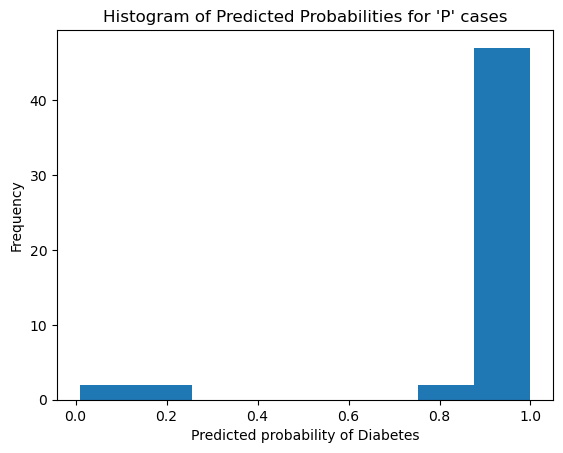

In [48]:
"""
The blue level between 0.0 to 0.02 indicates the frequency of the predicted probabilities that lie in that range. 
It shows that there are a few "P" cases with very low predicted probabilities of having diabetes.

The large blue bar covering 0.07 to 0.10 indicates that a majority of "P" cases have predicted probabilities 
between this range. This means that the model is predicting with high probability that most of the "P" cases 
actually have diabetes.

The frequency y-axis represents the number of "P" cases that fall within a particular range of predicted probabilities 
The frequency of more than 40 indicates that there are many "P" cases that have predicted probabilities within this 
range of 0.07 to 0.10.
"""
# Create a histogram of the predicted probabilities
plt.hist(probabilities_P, bins=8)
plt.xlabel("Predicted probability of Diabetes")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities for 'P' cases")
plt.show()
